This notebook explains how to extract the data from the predictor raster variables to the point layer with landslide presence/absence points

In [1]:
from pyspatialml import Raster
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas
import pandas as pd
import seaborn as sn
import rasterio.plot
import numpy as np

Setting up the directiry path

In [2]:
#os.chdir(r'../variables_future/')
os.chdir(r'D:\Yenbai_PCA\DEM_variables/')

Choosing all the predictors

In [3]:

predictors = ['dem_elevation.tif', 'lulc.tif', 'ndvi.tif', 'ndwi.tif', 'rivers.tif', 'roads.tif', 'geology.tif', 'faults.tif', 'twi.tif', 'spi.tif', 'tri.tif', 'roughness.tif', 'slope.tif', 'aspect.tif', 'profile.tif','plan.tif']
#predictors = ['dem_elevation.tif', 'lulc.tif', 'TWI.tif', 'TPI.tif', 'TRI.tif', 'SPI.tif', 'eastness.tif','northerness.tif', 'profile_curvature.tif', 'slope.tif', 'roughness.tif','planform_curvature.tif', 'rivers.tif', 'roads.tif', 'geology.tif', 'faults.tif', 'arvi.tif', 'dvi.tif', 'evi.tif', 'gari.tif', 'ipvi.tif', 'ndvi.tif', 'ndwi.tif']
#, 'arvi.tif', 'dvi.tif', 'evi.tif', 'gari.tif', 'gemi.tif', 'ipvi.tif', 'msavi2.tif', 'ndvi.tif', 'ndwi.tif', 'pvi.tif', 'savi.tif', 'vari.tif', 'wdvi.tif'

Making a raster stack of all the predictors. The predictors have the same extent, projection and resolution


In [4]:
stack = Raster(predictors)

Checking the bands in our stack


In [5]:
stack.names

dict_keys(['dem_elevation', 'lulc', 'ndvi', 'ndwi', 'rivers', 'roads', 'geology', 'faults', 'twi', 'spi', 'tri', 'roughness', 'slope', 'aspect', 'profile', 'plan'])

Reading the shapefile with landslide (centroids)/nonlandslide (randomly created) points and showing the first five rows

In [6]:
training_pt = geopandas.read_file(r'D:\Yenbai_PCA\shape_files\test_train_points_aoi\sample_points_MCC.shp')
training_pt.head(5)

,ID,Landslide,geometry
0,1,0,POINT (400515.284 2420848.298)
1,2,0,POINT (401417.396 2416631.050)
2,3,0,POINT (395474.734 2410467.545)
3,4,0,POINT (386869.427 2419814.344)
4,5,0,POINT (403537.896 2422633.924)


Plotting the landslide/non-landslide points on the background of the DEM


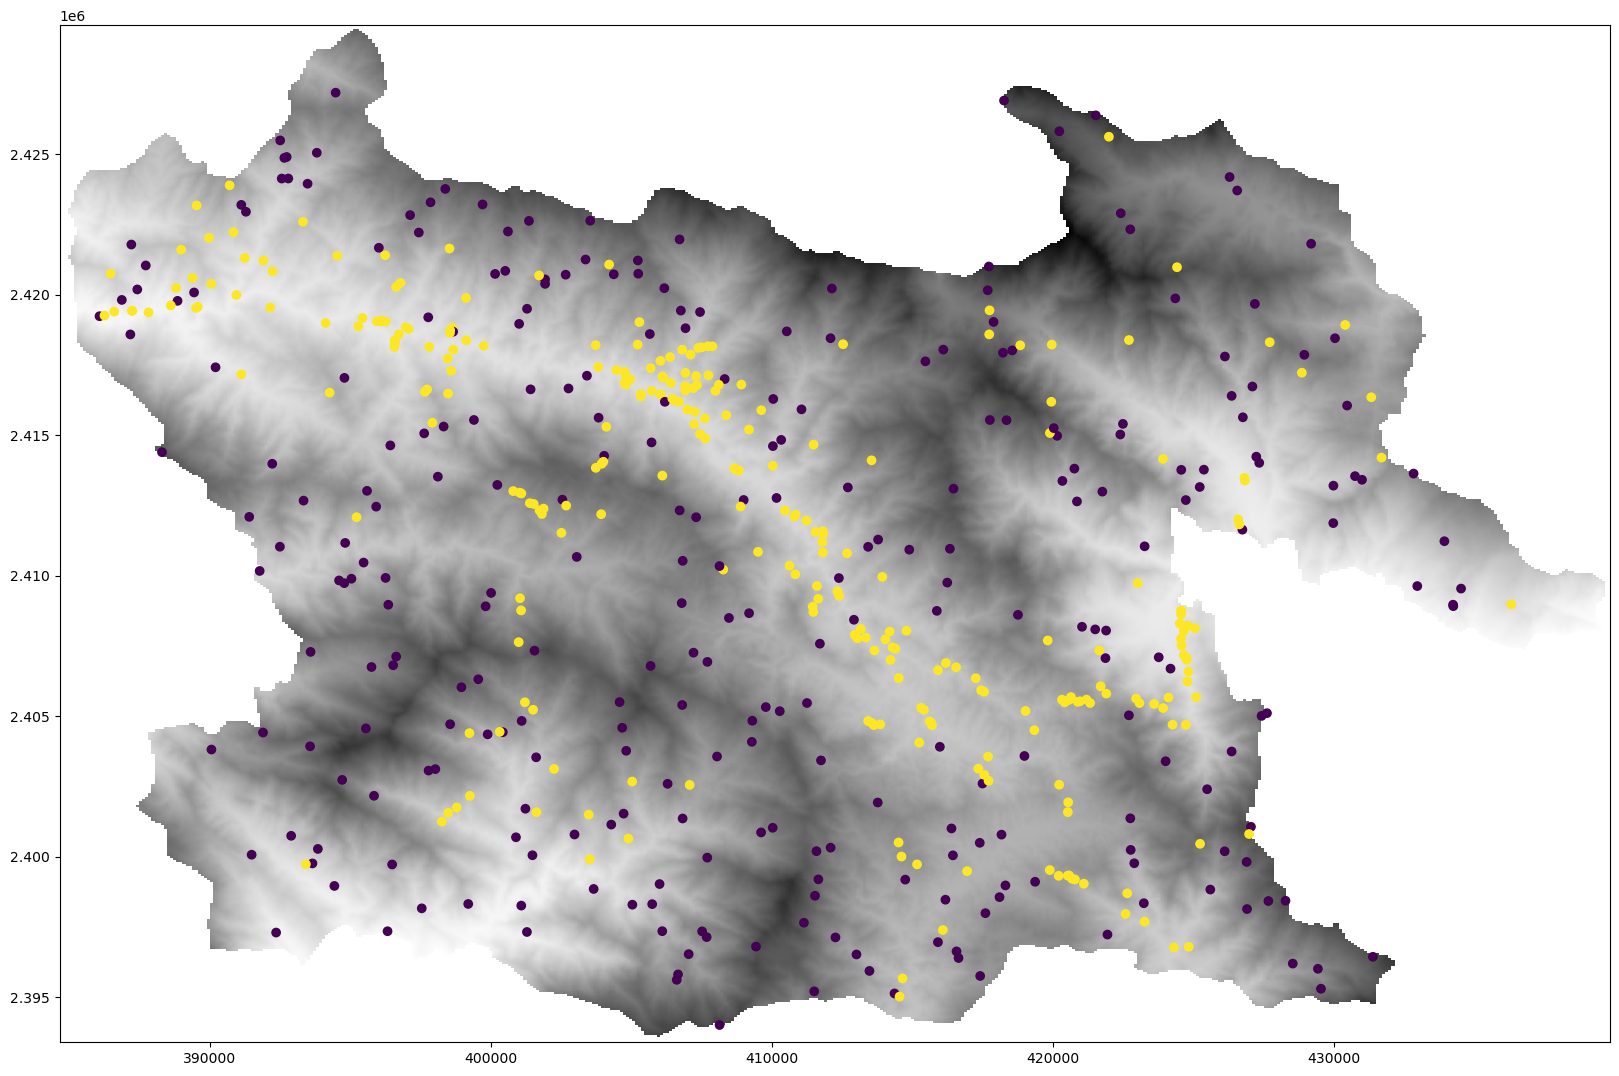

In [7]:
fig, ax = plt.subplots(figsize=(20, 20))
stack.dem_elevation.plot(ax=ax, cmap='Greys')
#training_pt.plot(column="class", ax=ax)
training_pt.plot(column="Landslide", ax=ax)
plt.savefig(r'figure1.png', bbox_inches='tight', dpi=1300)
plt.show()

Extracting the predictor features from the raster stack to our points


In [8]:
df_points = stack.extract_vector(training_pt)

Showing the first five rows


In [9]:
df_points.head(5)

,,dem_elevation,lulc,ndvi,ndwi,rivers,roads,geology,faults,twi,spi,tri,roughness,slope,aspect,profile,plan,geometry
pixel_idx,geometry_idx,,,,,,,,,,,,,,,,,
0,0,1507.0,6.0,6.0,-0.470232,301.0,50.0,66.0,501.0,12.729965,-4777.923340,9.899495,11.0,17.349325,140.194427,0.006387,-0.003023,POINT (400515.284 2420848.298)
1,1,1051.0,6.0,6.0,-0.505809,200.0,450.0,66.0,501.0,7.422777,6742.672852,7.348469,6.0,13.674946,99.462318,-0.012059,-0.024882,POINT (401417.396 2416631.050)
2,2,1227.0,6.0,6.0,-0.815217,150.0,150.0,66.0,500.0,13.313554,-1644.321167,6.164414,6.0,8.206727,303.690063,-0.020048,0.010241,POINT (395474.734 2410467.545)
3,3,872.0,6.0,6.0,-0.570341,200.0,501.0,66.0,501.0,12.767640,-697.416504,11.090536,10.0,17.744671,180.000000,0.011059,0.040000,POINT (386869.427 2419814.344)
4,4,2107.0,6.0,6.0,-0.786223,301.0,501.0,66.0,200.0,15.079862,-15198.347656,7.937254,9.0,14.366056,218.659805,-0.000710,-0.021941,POINT (403537.896 2422633.924)


Merging the data frame back with the class

In [10]:
df_points = df_points.merge(
    right=training_pt.loc[:, ["Landslide"]],
    left_on="geometry_idx",
    right_on="index",
    right_index=True
)

In [11]:
df_points.head(5)

,,dem_elevation,lulc,ndvi,ndwi,rivers,roads,geology,faults,twi,spi,tri,roughness,slope,aspect,profile,plan,geometry,Landslide
pixel_idx,geometry_idx,,,,,,,,,,,,,,,,,,
0,0,1507.0,6.0,6.0,-0.470232,301.0,50.0,66.0,501.0,12.729965,-4777.923340,9.899495,11.0,17.349325,140.194427,0.006387,-0.003023,POINT (400515.284 2420848.298),0
1,1,1051.0,6.0,6.0,-0.505809,200.0,450.0,66.0,501.0,7.422777,6742.672852,7.348469,6.0,13.674946,99.462318,-0.012059,-0.024882,POINT (401417.396 2416631.050),0
2,2,1227.0,6.0,6.0,-0.815217,150.0,150.0,66.0,500.0,13.313554,-1644.321167,6.164414,6.0,8.206727,303.690063,-0.020048,0.010241,POINT (395474.734 2410467.545),0
3,3,872.0,6.0,6.0,-0.570341,200.0,501.0,66.0,501.0,12.767640,-697.416504,11.090536,10.0,17.744671,180.000000,0.011059,0.040000,POINT (386869.427 2419814.344),0
4,4,2107.0,6.0,6.0,-0.786223,301.0,501.0,66.0,200.0,15.079862,-15198.347656,7.937254,9.0,14.366056,218.659805,-0.000710,-0.021941,POINT (403537.896 2422633.924),0


Dropping the "Geometry" column


In [12]:
df_points.to_csv('sample_points.csv', index = False)

In [13]:
data= df_points.drop(columns=['geometry'])

Decribing the data

In [14]:
data.describe()

,dem_elevation,lulc,ndvi,ndwi,rivers,roads,geology,faults,twi,spi,tri,roughness,slope,aspect,profile,plan,Landslide
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,1353.456294,5.688811,5.765734,-0.555060,190.641608,257.479021,69.739510,454.550699,11.109957,-3.918464e+03,11.328153,11.524476,19.141922,187.871510,-0.000295,0.001541,0.500000
std,388.406890,1.011846,0.685870,0.217702,95.882403,187.956952,9.086295,113.466379,3.681333,8.718968e+04,5.135284,5.432705,8.150492,94.103094,0.007556,0.047602,0.500438
min,470.000000,1.000000,2.000000,-0.877032,50.000000,50.000000,1.000000,50.000000,3.162856,-1.874437e+06,1.414214,1.000000,2.290610,4.085617,-0.025660,-0.320000,0.000000
25%,1068.000000,6.000000,6.000000,-0.748775,100.000000,100.000000,66.000000,501.000000,7.684280,-1.451920e+03,8.062258,8.000000,14.066447,120.240936,-0.005303,-0.013562,0.000000
50%,1312.500000,6.000000,6.000000,-0.569075,200.000000,200.000000,66.000000,501.000000,12.232399,2.296909e+01,10.535654,11.000000,18.255058,192.761711,-0.000000,-0.000000,0.500000
75%,1616.250000,6.000000,6.000000,-0.417680,301.000000,501.000000,81.000000,501.000000,14.007471,1.534045e+03,13.527749,14.000000,23.396502,252.623943,0.004600,0.017961,1.000000
max,2478.000000,7.000000,6.000000,0.593315,301.000000,501.000000,105.000000,501.000000,19.162764,3.938505e+05,44.011364,46.000000,55.748333,360.000000,0.030614,0.320000,1.000000


Cheking the data types in the columns and missing values


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 572 entries, (0, 0) to (571, 571)
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dem_elevation  572 non-null    float64
 1   lulc           572 non-null    float64
 2   ndvi           572 non-null    float64
 3   ndwi           572 non-null    float64
 4   rivers         572 non-null    float64
 5   roads          572 non-null    float64
 6   geology        572 non-null    float64
 7   faults         572 non-null    float64
 8   twi            572 non-null    float64
 9   spi            572 non-null    float64
 10  tri            572 non-null    float64
 11  roughness      572 non-null    float64
 12  slope          572 non-null    float64
 13  aspect         572 non-null    float64
 14  profile        572 non-null    float64
 15  plan           572 non-null    float64
 16  Landslide      572 non-null    int64  
dtypes: float64(16), int64(1)
memory usage: 99.

Saving data as a .csv file for later use

In [16]:
data.to_csv('sample_points.csv', index = False)